In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import os

# Base directory path
base_dir = '/content/drive/My Drive/Data Sets/Malaria Dataset'

# Training and testing directories
train_dir = os.path.join(base_dir, 'Train')
test_dir = os.path.join(base_dir, 'Test')

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create image data generators for training and testing
# Rescale the images by 1./255 to normalize pixel values from [0, 255] to [0, 1]
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Optional: add data augmentation parameters here
test_datagen = ImageDataGenerator(rescale=1./255)

# Prepare flow from directory for training and validation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Target size of the images, adjust depending on your model's input
    batch_size=32,
    class_mode='binary',  # Use 'binary' for binary classification, 'categorical' for multi-class
    subset='training'  # Specify this for training subset
)

# Prepare flow from directory for testing
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',  # Ensure this matches your problem type
    shuffle=False  # No need to shuffle the test data
)

Found 333 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [20]:
# Look at output dimensions and class indices to verify everything is as expected
for data_batch, labels_batch in train_generator:
    print('Data batch shape:', data_batch.shape)
    print('Labels batch shape:', labels_batch.shape)
    break  # Only show one batch

Data batch shape: (32, 128, 128, 3)
Labels batch shape: (32,)


In [21]:
# Set up paths
train_dir = '/content/drive/My Drive/Data Sets/Malaria Dataset/Train'
test_dir = '/content/drive/My Drive/Data Sets/Malaria Dataset/Test'

# Set up data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

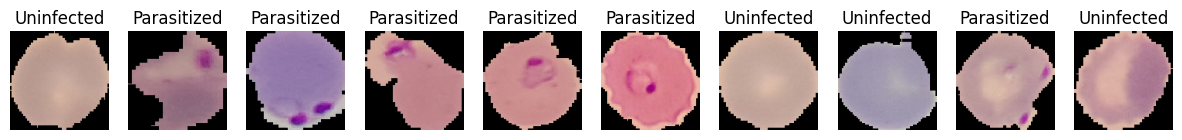

In [22]:
import matplotlib.pyplot as plt

# Display the first few images and their labels
num_samples = 10
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

for i in range(num_samples):
    axes[i].imshow(data_batch[i])
    label = "Parasitized" if labels_batch[i] == 0 else "Uninfected"
    axes[i].set_title(label)
    axes[i].axis('off')

plt.show()

In [23]:
# figure out how many samples in total
import os

# Define the base directory for the dataset
base_dir = '/content/drive/My Drive/Data Sets/Malaria Dataset'

# Directories containing the training and testing data
train_dir = os.path.join(base_dir, 'Train')
test_dir = os.path.join(base_dir, 'Test')

# Function to count the number of files in each category
def count_files_in_dir(directory):
    count = 0
    for subdir, _, files in os.walk(directory):
        count += len([file for file in files if file.lower().endswith(('png', 'jpg', 'jpeg'))])
    return count

# Count samples in the Train and Test folders
train_samples = count_files_in_dir(train_dir)
test_samples = count_files_in_dir(test_dir)

# Display the counts
print(f"Training samples: {train_samples}")
print(f"Testing samples: {test_samples}")
print(f"Total samples: {train_samples + test_samples}")

Training samples: 416
Testing samples: 134
Total samples: 550


In [24]:
# Print the total number of samples
print(f"Training samples: {train_generator.samples}")
print(f"Testing samples: {test_generator.samples}")

# Fetch a batch of data to inspect its shape
train_batch, train_labels = next(train_generator)
test_batch, test_labels = next(test_generator)

# Print the shapes of individual batches
print(f"Training batch shape: {train_batch.shape}")
print(f"Training labels shape: {train_labels.shape}")

print(f"Testing batch shape: {test_batch.shape}")
print(f"Testing labels shape: {test_labels.shape}")

Training samples: 333
Testing samples: 134
Training batch shape: (32, 128, 128, 3)
Training labels shape: (32,)
Testing batch shape: (32, 128, 128, 3)
Testing labels shape: (32,)


In [25]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 128)      

In [26]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Use 'categorical_crossentropy' if needed
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_generator,
    epochs=20,
    verbose=1
)

Epoch 1/20
11/11 [==============================] - 7s 213ms/step - loss: 0.7269 - accuracy: 0.5105
Epoch 2/20
11/11 [==============================] - 2s 137ms/step - loss: 0.6612 - accuracy: 0.5856
Epoch 3/20
11/11 [==============================] - 2s 135ms/step - loss: 0.5702 - accuracy: 0.7117
Epoch 4/20
11/11 [==============================] - 2s 146ms/step - loss: 0.5853 - accuracy: 0.7027
Epoch 5/20
11/11 [==============================] - 2s 167ms/step - loss: 0.4411 - accuracy: 0.7808
Epoch 6/20
11/11 [==============================] - 2s 165ms/step - loss: 0.3805 - accuracy: 0.8198
Epoch 7/20
11/11 [==============================] - 2s 152ms/step - loss: 0.3130 - accuracy: 0.8799
Epoch 8/20
11/11 [==============================] - 2s 138ms/step - loss: 0.2552 - accuracy: 0.9069
Epoch 9/20
11/11 [==============================] - 2s 137ms/step - loss: 0.1847 - accuracy: 0.9309
Epoch 10/20
11/11 [==============================] - 2s 134ms/step - loss: 0.1302 - accuracy: 0.9489

In [28]:
# Evaluate the model using the test generator
test_loss, test_acc = model.evaluate(test_generator)

# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

5/5 [==============================] - 1s 132ms/step - loss: 0.6687 - accuracy: 0.8060
Test Loss: 0.668705940246582
Test Accuracy: 0.8059701323509216


In [29]:
predictions = model.predict(test_generator)

print(predictions[:10])

5/5 [==============================] - 1s 130ms/step
[[1.5899348e-03]
 [4.8628764e-05]
 [4.5546149e-06]
 [8.5299225e-06]
 [3.0918337e-09]
 [9.9774867e-01]
 [8.1761056e-05]
 [4.3190103e-06]
 [1.1052058e-06]
 [2.7779397e-01]]


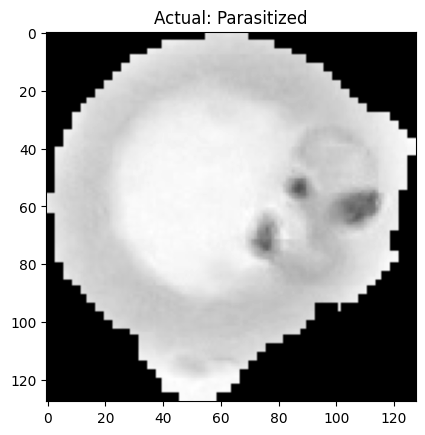

1/1 [==============================] - 0s 78ms/step
Predicted: Parasitized


In [30]:
import cv2
import numpy as np

test_images, test_labels = next(test_generator)

index = 0

gray_image = cv2.cvtColor(test_images[index], cv2.COLOR_RGB2GRAY)

# Plot the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title(f"Actual: {'Parasitized' if test_labels[index] == 0 else 'Uninfected'}")
plt.show()

predictions = model.predict(np.expand_dims(test_images[index], axis=0))

predicted_class = 'Parasitized' if predictions[0][0] < 0.5 else 'Uninfected'
print(f"Predicted: {predicted_class}")